<a href="https://colab.research.google.com/github/sarveesh/mastersProject/blob/develop/customCfgVoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/giuliogamba/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5497, done.
remote: Total 5497 (delta 0), reused 0 (delta 0), pack-reused 5497
Receiving objects: 100% (5497/5497), 4.63 MiB | 31.18 MiB/s, done.
Resolving deltas: 100% (3651/3651), done.


In [5]:
%ls

cfg/      examples/  LICENSE.fuck  LICENSE.meta  Makefile   scripts/
darknet/  include/   LICENSE.gen   LICENSE.mit   python/    src/
data/     LICENSE    LICENSE.gpl   LICENSE.v1    README.md


In [40]:
%cd /content/darknet/darknet

/content/darknet/darknet


In [41]:
!make

gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DGPU -DCUDNN -c ./examples/detector.c -o obj/detector.o
./examples/detector.c: In function ‘draw_detection_python’:
./examples/detector.c:644:21: warning: implicit declaration of function ‘load_alphabet_path’; did you mean ‘load_alphabet’? [-Wimplicit-function-declaration]
  image **alphabet = load_alphabet_path(path_darknet);
                     ^~~~~~~~~~~~~~~~~~
                     load_alphabet
./examples/detector.c:644:21: warning: initialization makes pointer from integer without a cast [-Wint-conversion]
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchr

In [8]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar

--2021-08-12 21:07:03--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G   105MB/s    in 19s     

2021-08-12 21:07:22 (103 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2021-08-12 21:07:22--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M   105MB/s    in 4.2s    

2021-08-12 21:07:26 (104 MB/s

In [9]:
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

In [10]:
!wget https://pjreddie.com/media/files/voc_label.py

--2021-08-12 21:08:02--  https://pjreddie.com/media/files/voc_label.py
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042 (2.0K) [application/octet-stream]
Saving to: ‘voc_label.py’

voc_label.py        100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-08-12 21:08:02 (670 MB/s) - ‘voc_label.py’ saved [2042/2042]



In [12]:
!python voc_label.py

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt


In [18]:
%ls

2007_test.txt   examples/       LICENSE.meta  scripts/
2007_train.txt  include/        LICENSE.mit   src/
2007_val.txt    libdarknet.a    LICENSE.v1    train.txt
2012_train.txt  libdarknet.so*  Makefile      VOCdevkit/
2012_val.txt    LICENSE         obj/          voc_label.py
cfg/            LICENSE.fuck    python/       VOCtest_06-Nov-2007.tar
darknet*        LICENSE.gen     README.md     VOCtrainval_06-Nov-2007.tar
data/           LICENSE.gpl     results/      VOCtrainval_11-May-2012.tar


tinier-yolo-bwn-3bit-relu-nomaxpool
layer     filters    size              input                output
    0 conv     16  3 x 3 / 2   416 x 416 x   3   ->   208 x 208 x  16
    1 conv     64  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  64
    2 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    3 conv     64  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  64
    4 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    5 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128
    6 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    7 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256
    8 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
    9 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512
   10 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   11 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13

In [37]:
!./darknet detector calc_anchors /content/darknet/darknet/data/hand.data -num_of_clusters 5 -width 13 -height 13 -show



In [34]:
%ls /content/darknet/darknet/data/

9k.labels   coco.names   goal.txt                  inet9k.map  voc.names
9k.names    dog.jpg      horses.jpg                labels/
9k.tree     eagle.jpg    imagenet.labels.list      person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg


In [70]:
 !./darknet detector train cfg/voc.data cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg 

Streaming output truncated to the last 5000 lines.
Region Avg IOU: 0.566738, Class: 1.000000, Obj: 0.151038, No Obj: 0.002386, Avg Recall: 0.680000,  count: 25
39013: 5.425042, 5.916998 avg, 0.001000 rate, 0.353212 seconds, 2496832 images
Loaded: 0.000053 seconds
Region Avg IOU: 0.500311, Class: 1.000000, Obj: 0.081548, No Obj: 0.001987, Avg Recall: 0.500000,  count: 18
Region Avg IOU: 0.586445, Class: 1.000000, Obj: 0.151767, No Obj: 0.002654, Avg Recall: 0.714286,  count: 28
39014: 5.472628, 5.872561 avg, 0.001000 rate, 0.378182 seconds, 2496896 images
Loaded: 0.000050 seconds
Region Avg IOU: 0.523167, Class: 1.000000, Obj: 0.162902, No Obj: 0.002466, Avg Recall: 0.529412,  count: 17
Region Avg IOU: 0.542157, Class: 1.000000, Obj: 0.074347, No Obj: 0.002257, Avg Recall: 0.545455,  count: 11
39015: 3.107596, 5.596065 avg, 0.001000 rate, 0.377238 seconds, 2496960 images
Loaded: 0.000058 seconds
Region Avg IOU: 0.474945, Class: 1.000000, Obj: 0.165391, No Obj: 0.003168, Avg Recall: 0.45

In [90]:
!./darknet detector test cfg/voc.data /content/darknet/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights data/person.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 2   416 x 416 x   3   ->   208 x 208 x  16
    1 conv     64  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  64
    2 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    3 conv     64  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  64
    4 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    5 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128
    6 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    7 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256
    8 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
    9 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512
   10 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   11 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   13 conv     30  1 x 

In [91]:
%ls

2007_test.txt            libdarknet.a     python/
2007_train.txt           libdarknet.so*   README.md
2007_val.txt             LICENSE          results/
2012_train.txt           LICENSE.fuck     scripts/
2012_val.txt             LICENSE.gen      src/
cfg/                     LICENSE.gpl      train.txt
darknet*                 LICENSE.meta     VOCdevkit/
data/                    LICENSE.mit      voc_label_difficult.py
difficult_2007_test.txt  LICENSE.v1       voc_label.py
difficult_2012_val.txt   Makefile         VOCtest_06-Nov-2007.tar
examples/                obj/             VOCtrainval_06-Nov-2007.tar
include/                 predictions.jpg  VOCtrainval_11-May-2012.tar


In [92]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

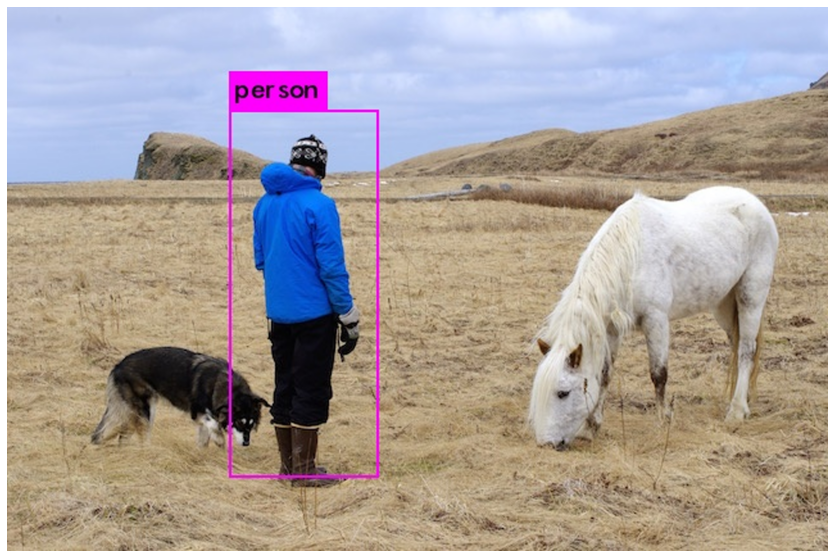

In [93]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector map cfg/voc.data /content/darknet/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights

In [99]:
%ls

2007_test.txt            libdarknet.a     python/
2007_train.txt           libdarknet.so*   README.md
2007_val.txt             LICENSE          results/
2012_train.txt           LICENSE.fuck     scripts/
2012_val.txt             LICENSE.gen      src/
cfg/                     LICENSE.gpl      train.txt
darknet*                 LICENSE.meta     VOCdevkit/
data/                    LICENSE.mit      voc_label_difficult.py
difficult_2007_test.txt  LICENSE.v1       voc_label.py
difficult_2012_val.txt   Makefile         VOCtest_06-Nov-2007.tar
examples/                obj/             VOCtrainval_06-Nov-2007.tar
include/                 predictions.jpg  VOCtrainval_11-May-2012.tar


In [102]:
!./darknet detector map cfg/voc.data /content/darknet/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights -dont_show -ext_output < /content/darknet/darknet/2007_test.txt > results/result.txt

In [103]:
%ls

2007_test.txt            libdarknet.so*   results/
2007_train.txt           LICENSE          result.txt
2007_val.txt             LICENSE.fuck     scripts/
2012_train.txt           LICENSE.gen      src/
2012_val.txt             LICENSE.gpl      train.txt
cfg/                     LICENSE.meta     VOCdevkit/
darknet*                 LICENSE.mit      voc_label_difficult.py
data/                    LICENSE.v1       voc_label.py
difficult_2007_test.txt  Makefile         VOCtest_06-Nov-2007.tar
difficult_2012_val.txt   obj/             VOCtrainval_06-Nov-2007.tar
examples/                predictions.jpg  VOCtrainval_11-May-2012.tar
include/                 python/
libdarknet.a             README.md
